In [59]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns",None)

In [60]:
data = pd.read_csv("/content/covid_cases.csv")

In [61]:
df = data.copy()

In [62]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


# missing values

In [64]:
df.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


In [65]:
df[df["fever"].isnull()]

,age,gender,fever,cough,city,has_covid
5,84,Female,NaN,Mild,Bangalore,Yes
7,20,Female,NaN,Strong,Mumbai,Yes
10,75,Female,NaN,Mild,Delhi,No
19,42,Female,NaN,Strong,Bangalore,Yes
25,23,Male,NaN,Mild,Mumbai,No
29,34,Female,NaN,Strong,Mumbai,Yes
41,82,Male,NaN,Mild,Kolkata,Yes
56,71,Male,NaN,Strong,Kolkata,No
91,38,Male,NaN,Mild,Delhi,Yes
94,79,Male,NaN,Strong,Kolkata,Yes


the missing values into the feaver feature are **MCAR** so imputating these values based on mean/median/mode based on outliers.

<ipython-input-66-2c4862d6803a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["fever"])


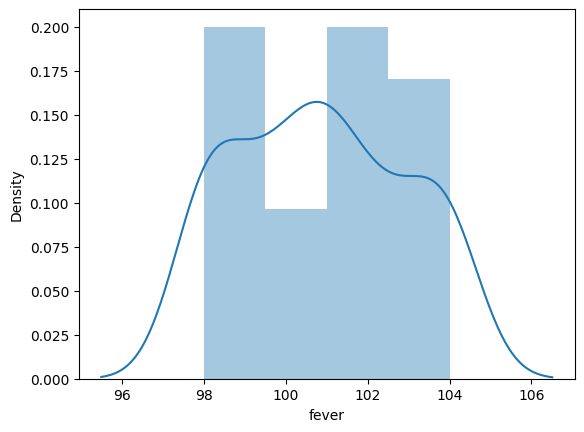

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(df["fever"])
plt.show()

In [67]:
df["fever"].median()

101.0

In [68]:
df["fever"] = df["fever"].fillna(df["fever"].mean())

<ipython-input-69-ff75a77e6439>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["fever"])


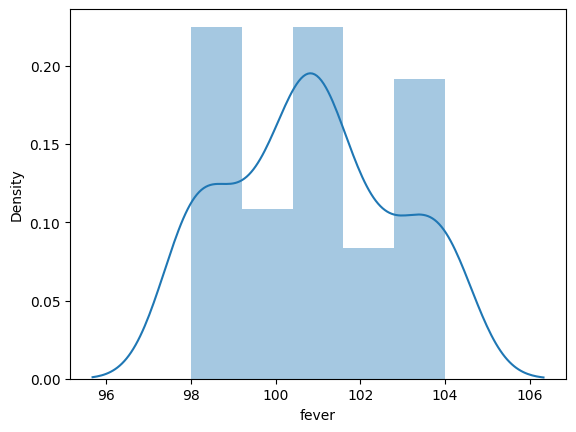

In [69]:
sns.distplot(df["fever"])
plt.show()

In [70]:
df["fever"].median()

100.92222222222222

# imbalancement of dataset

In [71]:
df["has_covid"].value_counts()/len(df)*100

,count
has_covid,
No,55.0
Yes,45.0


dataset is not highly imbalanced.

# Encoding

In [72]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


# 1.gender feature

In [73]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [74]:
gender = {"Male":0,"Female":1}

In [75]:
df["gender"] = df["gender"].map(gender)

In [76]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,0,103.0,Mild,Kolkata,No
1,27,0,100.0,Mild,Delhi,Yes
2,42,0,101.0,Mild,Delhi,No
3,31,1,98.0,Mild,Kolkata,No
4,65,1,101.0,Mild,Mumbai,No


# 2. cough feature

In [77]:
df.cough.unique()

array(['Mild', 'Strong'], dtype=object)

In [78]:
cough = {"Mild":0,"Strong":1}

In [79]:
df["cough"] = df["cough"].map(cough)

In [80]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,0,103.0,0,Kolkata,No
1,27,0,100.0,0,Delhi,Yes
2,42,0,101.0,0,Delhi,No
3,31,1,98.0,0,Kolkata,No
4,65,1,101.0,0,Mumbai,No


# 3.city

In [81]:
df.city.unique()

array(['Kolkata', 'Delhi', 'Mumbai', 'Bangalore'], dtype=object)

In [82]:
city = {"Kolkata":0,"Delhi":1,"Mumbai":2,"Bangalore":3}

In [83]:
df["city"] = df["city"].map(city)

In [84]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,0,103.0,0,0,No
1,27,0,100.0,0,1,Yes
2,42,0,101.0,0,1,No
3,31,1,98.0,0,0,No
4,65,1,101.0,0,2,No


# 4.has_covid

In [86]:
df.has_covid.unique()

array(['No', 'Yes'], dtype=object)

In [87]:
covid = {"No":0,"Yes":1}

In [88]:
df["has_covid"] = df["has_covid"].map(covid)

In [89]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,0,103.0,0,0,0
1,27,0,100.0,0,1,1
2,42,0,101.0,0,1,0
3,31,1,98.0,0,0,0
4,65,1,101.0,0,2,0


In [90]:
df.to_csv("covid_cleaned.csv",index=False)